In [2]:
from networkx.algorithms import bipartite
import csv
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [3]:
movies = []
with open('SENA_DataSet - MCUActorList.csv',encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        movies.append(line[0])
movies

['Iron Man',
 'The incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The first Avenger',
 "Marvel's the Avengers",
 'Iron Man 3',
 'Thor: The dark world',
 'Captain America : The Winter Soldier',
 'Guardians Of the Galaxy',
 'Avengers : Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man:Homecoming',
 'Thor:Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain-Marvel',
 'Avengers:Endgame',
 'Spider-Man:Far From Home',
 'Black Widow',
 'Shang-Chi and the Legend of the Ten Rings',
 'Eternals',
 'Spider-Man: No Way Home',
 'Doctor Strange in the Multiverse of Madness',
 'Thor: Love and Thunder',
 'Werewolf by Night',
 "Marvels' Agents of S.H.I.E.L.D.",
 "Marvel's Agent Carter",
 "Marvels's Daredevil",
 'Marvel - Jessica Jones',
 "Marvel's Luke Cage",
 "Marvel's Iron Fist",
 'Marvel - The Defenders',
 'Inhumans',
 "Marvel's The Punisher",
 "Marvel's Runaways",
 'Cloak &

In [4]:
actors = set()
with open('SENA_DataSet - MCUActorList.csv', encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        for actor in line[1:]:
            if actor != '':
                actors.add(actor)
actors

{'Adam Beach',
 'Alaqua Cox ',
 'Alexandra Shipp',
 'Alfre Woodard',
 'Alice Braga',
 'Allegra Acosta',
 'Amber Rose Revah',
 'Andrea Roth',
 'Andrew Garfield',
 'Angelina Jolie',
 'Anna Paquin',
 'Anson Mount',
 'Anthony Hopkins',
 'Anthony Mackie',
 'Anya Taylor-Joy',
 'Ariela Barer',
 'Aubrey Joseph',
 'Awkwafina',
 'Barry Keoghan',
 'Ben Barnes',
 'Ben Kingsley',
 'Ben Mendelsohn',
 'Benedict Cumberbatch',
 'Benedict Wong',
 'Blu Hunt',
 'Boyd Holbrook',
 'Brad Pitt',
 'Bradely Cooper',
 'Bradley Cooper',
 'Brett Dalton',
 'Brianna Hildebrand',
 'Bridget Regan',
 'Brie Larson',
 'Bruce Davison',
 'Cate Blanchett',
 'Chad Michel Murray',
 'Chadwick Boseman',
 'Charlie Cox',
 'Charlie Heaton',
 'Chiswetel Ejiofor',
 'Chloe Bennet',
 'Chris Evans',
 'Chris Hemsworth',
 'Chris Patt',
 'Christian Bale',
 'Clark Gregg',
 'Colby Minifie',
 'Corey Stall',
 'Dafne Keen',
 'Danial Bruhl',
 'Danniel Bruhl',
 'Danny Huston',
 'Dave Bautista',
 'David Harbour',
 'David Tennant',
 'David Wenham'

In [5]:
G = nx.Graph()

In [6]:
G.add_nodes_from(actors,bipartite='Actors')
G.add_nodes_from(movies,bipartite='Movies')

In [7]:
with open('SENA_DataSet - MCUActorList.csv', encoding = "utf8") as f:
    file = csv.reader(f)
    for line in file:
        movie = line[0]
        for i in line[1:]:
            if i != '':
                G.add_edge(movie,i)

In [8]:
actor_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Actors']
movie_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Movies']
print('Actors : ',actor_nodes,end='\n\n')
print('Movies : ',movie_nodes,end='\n\n')
print('Is Bipartite : ',bipartite.is_bipartite(G))
print(bipartite.is_bipartite_node_set(G,actor_nodes))

Actors :  ['Jessica Henwick', 'Taylor Kitsch', 'Morena Baccarin', "Lupita Nyong'o", 'Paul Rudd', 'Hugo Weaving', 'Michael Douglas', 'Liv Tyler', 'Mark Ruffalo', 'Aubrey Joseph', 'Hiroyuki Sanada', 'Rebecca Romijn', 'Yasmeen Fletcher', 'Edward Norton', 'Zazie Beetz', 'Liev Schreiber', 'Cate Blanchett', 'Iwan Rheon', 'Andrew Garfield', 'Jonathan Majors', 'Elden Henson', 'Nicholas Hoult', 'Josh Brolin', 'Oscar Isaac', 'Iman Vellani', 'Dave Bautista', 'Chadwick Boseman', 'Alice Braga', 'Alfre Woodard', 'Sophia Di Martino', 'Florida Lima', 'David Tennant', 'Mike Moh', 'Clark Gregg', 'Rossario Dawson', 'Chad Michel Murray', 'Ben Barnes', 'Wyatt Russell', 'Lynn Collins', 'Jeff Goldblum', 'Fawad Khan', 'Teyonah Parris', 'Elizabeth Henstridge', 'Iain De Caestecker', 'Mahershala Ali', 'Randall Park', 'Rachel Weisz', 'Benedict Cumberbatch', 'Christian Bale', 'Richard Madden', 'Tim Roth', 'Chiswetel Ejiofor', 'Simu Liu', 'Ryan Reynolds', 'Eme Ikwuakor', 'Barry Keoghan', 'Sebastian Stan', 'Erin Mor

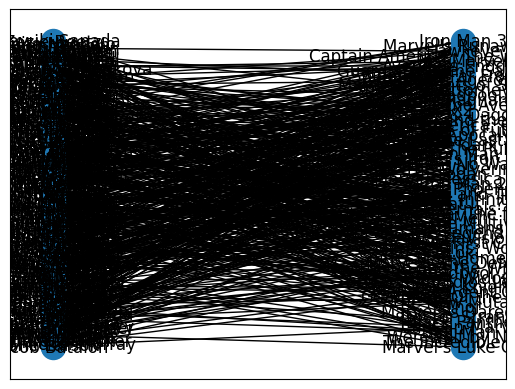

In [8]:
nx.draw_networkx(G,pos=nx.drawing.bipartite_layout(G,actors),width=1)

In [21]:
nx.write_gexf(G,'MCU_actors_movies_bipartite.gexf')

In [9]:
B = bipartite.weighted_projected_graph(G, actors, ratio=False)
B.edges(data=True)

EdgeDataView([('Jessica Henwick', 'Rachel Taylor', {'weight': 1}), ('Jessica Henwick', 'Tom Pelphery', {'weight': 1}), ('Jessica Henwick', 'Elden Henson', {'weight': 1}), ('Jessica Henwick', 'David Wenham', {'weight': 1}), ('Jessica Henwick', 'Jessica Stroup', {'weight': 1}), ('Jessica Henwick', 'Finn Jones', {'weight': 2}), ('Jessica Henwick', 'Rossario Dawson', {'weight': 1}), ('Jessica Henwick', 'Charlie Cox', {'weight': 1}), ('Jessica Henwick', 'Deborah Ann Woll', {'weight': 1}), ('Jessica Henwick', 'Mike Colter', {'weight': 1}), ('Jessica Henwick', 'Simone Missick', {'weight': 1}), ('Taylor Kitsch', 'Hugh Jackman', {'weight': 1}), ('Taylor Kitsch', 'Liev Schreiber', {'weight': 1}), ('Taylor Kitsch', 'will.i.am', {'weight': 1}), ('Taylor Kitsch', 'Lynn Collins', {'weight': 1}), ('Taylor Kitsch', 'Ryan Reynolds', {'weight': 1}), ('Taylor Kitsch', 'Danny Huston', {'weight': 1}), ('Morena Baccarin', 'Brad Pitt', {'weight': 1}), ('Morena Baccarin', 'Zazie Beetz', {'weight': 1}), ('More

In [23]:
nx.write_gexf(B,'MCU_actors_projections.gexf')

In [11]:
number_of_connected_components = nx.number_connected_components(B)
print('Number of Connected Components : ', number_of_connected_components,end='\n\n')
connected_components = list(nx.connected_components(B))
for i in connected_components:
    print(i,end='\n\n')


Number of Connected Components :  7

{'Jessica Henwick', 'Taylor Kitsch', 'Morena Baccarin', "Lupita Nyong'o", 'Paul Rudd', 'Hugo Weaving', 'Michael Douglas', 'Mark Ruffalo', 'Liv Tyler', 'Hiroyuki Sanada', 'Rebecca Romijn', 'Yasmeen Fletcher', 'Edward Norton', 'Zazie Beetz', 'Liev Schreiber', 'Cate Blanchett', 'Andrew Garfield', 'Jonathan Majors', 'Elden Henson', 'Nicholas Hoult', 'Josh Brolin', 'Iman Vellani', 'Dave Bautista', 'Chadwick Boseman', 'Alfre Woodard', 'Sophia Di Martino', 'Florida Lima', 'David Tennant', 'Mike Colter', 'Rossario Dawson', 'Clark Gregg', 'Ben Barnes', 'Wyatt Russell', 'Chad Michel Murray', 'Lynn Collins', 'Jeff Goldblum', 'Fawad Khan', 'Teyonah Parris', 'Elizabeth Henstridge', 'Iain De Caestecker', 'Mahershala Ali', 'Randall Park', 'Rachel Weisz', 'Benedict Cumberbatch', 'Christian Bale', 'Tim Roth', 'Chiswetel Ejiofor', 'Simu Liu', 'Ryan Reynolds', 'Sebastian Stan', 'Erin Moriarty', 'Bradley Cooper', 'Lucas Till', 'Brad Pitt', 'Lyrica Okano', 'Rosario Daws

Number of actors in largest connected components :  192


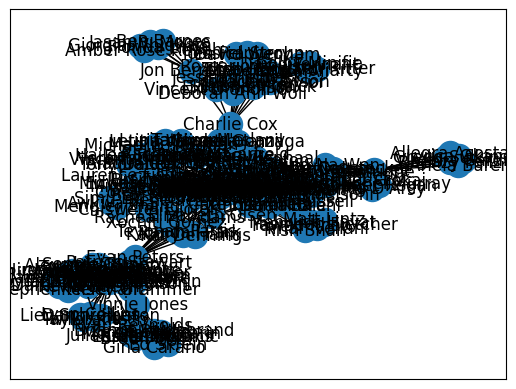

In [21]:
largest_connected_component = list(sorted(connected_components,reverse=True,key=len)[0])
print('Number of actors in largest connected components : ',len(largest_connected_component))
sub_graph = B.subgraph(largest_connected_component).copy()
nx.draw_networkx(sub_graph)

In [22]:
nx.write_gexf(sub_graph,'MCU_actors_largest_component.gexf')

In [24]:
edge_betweenness_centrality = nx.edge_betweenness_centrality(sub_graph)
edge_betweenness_centrality = sorted(list(edge_betweenness_centrality.items()),key=lambda x : x[1],reverse=True)
edge_betweenness_centrality


[(('Benedict Cumberbatch', 'Patrick Stewart'), 0.1452318367591446),
 (('Benedict Cumberbatch', 'Charlie Cox'), 0.10314898009590141),
 (('Patrick Stewart', 'Vinnie Jones'), 0.08962162501589103),
 (('Evan Peters', 'Paul Bettany'), 0.07534023671800842),
 (('Patrick Stewart', 'Elisabeth Olsen'), 0.07197261452094081),
 (('Benedict Wong', 'Patrick Stewart'), 0.05855120988493744),
 (('Charlie Cox', 'Jon Bernthal'), 0.05511795686861132),
 (('Mark Ruffalo', 'Charlie Cox'), 0.04625624711603118),
 (('Samuel L. Jackson', 'Stan Lee'), 0.04619688292388532),
 (('Jon Favreau', 'Charlie Cox'), 0.03953954144788829),
 (('Hugh Jackman', 'Patrick Stewart'), 0.03891313322658157),
 (('Charlie Cox', 'Rachel Taylor'), 0.03419593513670734),
 (('Tom Holland', 'Charlie Cox'), 0.03379894219657239),
 (('Charlie Cox', 'Finn Jones'), 0.029894742582897),
 (('Rosario Dawson', 'Charlie Cox'), 0.027246945898778362),
 (('Jessica Henwick', 'Charlie Cox'), 0.024462805410122114),
 (('Evan Peters', 'Hugh Jackman'), 0.02247516